# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Artech House, 2020
<br/>

# Reflection and Transmission
***

Referring to Section 2.6, practical radar problems involve waves propagating in bounded regions and interacting with media of differing constitutive parameters.  These media may include the targets of interest to the radar system as well as other regions such as rain, buildings, trees, and birds.  Therefore, it is beneficial to study the reflection and refraction of electromagnetic waves occurring when a wave traveling in a given medium impinges on another medium with a different set of constitutive parameters.

The reflection and transmission coefficients for perpendicular polarization are given by (Equations 2.102 and 2.103)

\begin{align}
\Gamma_{{\scriptstyle TE}} &= \frac{\eta_2 \cos \theta_i - \eta_1 \cos \theta_t}{\eta_2 \cos \theta_i + \eta_1 \cos \theta_t},\\ \nonumber \\
\mathrm{T}_{{\scriptstyle TE}} &= \frac{2\, \eta_2 \cos \theta_i}{\eta_2 \cos \theta_i + \eta_1 \cos \theta_t}
\end{align}

The reflection and transmission coefficients for parallel polarization are given by (Equations 2.114 and 2.115)

\begin{align}
\Gamma_{{\scriptstyle TM}} &= \frac{\eta_2 \cos \theta_t - \eta_1 \cos \theta_i}{\eta_2 \cos \theta_t + \eta_1 \cos \theta_i} \label{eq:parallel_reflection_coefficient},\\ \nonumber \\
\mathrm{T}_{{\scriptstyle TM}} &= \frac{2 \, \eta_2 \cos \theta_i}{\eta_2 \cos \theta_t + \eta_1 \cos \theta_i}.
\end{align}
***

Begin by getting library path

In [14]:
import lib_path

Set the operating frequency (Hz), th relative permittivity, the relative permeability, and the conductivity (S/m) for the different regions using the `array` routine from `scipy`

In [15]:
from scipy import array

frequency = 300e6

relative_permittivity = array([1.3, 2.8])

relative_permeability = array([1.0, 1.0])

conductivity = array([0.01, 0.01])

Set up the keyword args

In [16]:
kwargs = {'frequency':              frequency,

          'relative_permittivity':  relative_permittivity,

          'relative_permeability':  relative_permeability,

          'conductivity':           conductivity}

Calculate the critical angle and Brewster angle using the `plane_waves` routine from `wave_propagation`

In [17]:
from Libs.wave_propagation import plane_waves

critical_angle = plane_waves.critical_angle(**kwargs)

brewster_angle = plane_waves.brewster_angle(**kwargs)


# Display the results

print('Critical Angle {:.1f}'.format(critical_angle))

print('Brewster Angle {:.1f}'.format(brewster_angle))

Critical Angle 81.1+51.0j
Brewster Angle 54.8+3.0j


Set the incident angles using the `linspace` routine from `scipy`

In [18]:
from scipy import linspace

from scipy.constants import pi

incident_angle = linspace(0., 0.5 * pi, 1000)

Set up the keyword args

In [19]:
kwargs = {'frequency': frequency,

          'incident_angle': incident_angle,

          'relative_permittivity': relative_permittivity,

          'relative_permeability': relative_permeability,

          'conductivity': conductivity}

Calculate the reflection and transmission coefficients using the `plane_waves` routines from `wave_propagation`

In [20]:
reflection_coefficient_te, transmission_coefficient_te, reflection_coefficient_tm, transmission_coefficient_tm = plane_waves.reflection_transmission(**kwargs)

Display the reflection and transmission coefficients using the `matplotlib` routines

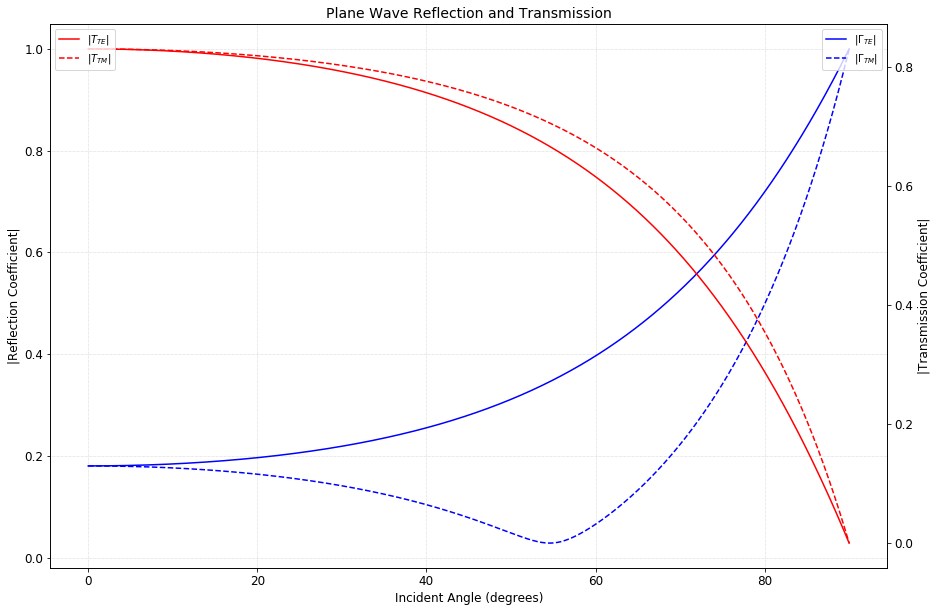

In [21]:
from matplotlib import pyplot as plt

from scipy import degrees


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)

# Set up the axes

fig, axes1 = plt.subplots()

axes2 = axes1.twinx()



# Display the reflection coefficients

axes1.plot(degrees(incident_angle), abs(reflection_coefficient_te), 'b', label='|$\Gamma_{TE}$|')

axes1.plot(degrees(incident_angle), abs(reflection_coefficient_tm), 'b--', label='|$\Gamma_{TM}$|')



# Display the transmission coefficients

axes2.plot(degrees(incident_angle), abs(transmission_coefficient_te), 'r', label='|$T_{TE}$|')

axes2.plot(degrees(incident_angle), abs(transmission_coefficient_tm), 'r--', label='|$T_{TM}$|')



# Set the plot title and labels

axes1.set_title('Plane Wave Reflection and Transmission', size=14)

axes1.set_xlabel('Incident Angle (degrees)', size=12)

axes1.set_ylabel('|Reflection Coefficient|', size=12)

axes2.set_ylabel('|Transmission Coefficient|', size=12)



# Set the tick label size

axes1.tick_params(labelsize=12)

axes2.tick_params(labelsize=12)



# Set the legend

axes1.legend(loc='upper right', prop={'size': 10})

axes2.legend(loc='upper left', prop={'size': 10})



# Turn on the grid

axes1.grid(linestyle=':', linewidth=0.5)